In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df=pd.read_csv('train.csv')

In [223]:
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1048575 non-null  object 
 1   fare_amount        1048575 non-null  float64
 2   pickup_datetime    1048575 non-null  object 
 3   pickup_longitude   1048575 non-null  float64
 4   pickup_latitude    1048575 non-null  float64
 5   dropoff_longitude  1048565 non-null  float64
 6   dropoff_latitude   1048565 non-null  float64
dtypes: float64(5), object(2)
memory usage: 56.0+ MB


# data Preprocessing

In [225]:
#delete Column
df1=df.drop(['pickup_datetime','key'],axis=1)
df1

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4.5,-73.844311,40.721319,-73.841610,40.712278
1,16.9,-74.016048,40.711303,-73.979268,40.782004
2,5.7,-73.982738,40.761270,-73.991242,40.750562
3,7.7,-73.987130,40.733143,-73.991567,40.758092
4,5.3,-73.968095,40.768008,-73.956655,40.783762
...,...,...,...,...,...
1048570,7.0,-73.962580,40.778222,-73.973827,40.764247
1048571,8.9,-73.990152,40.740837,-73.995193,40.760206
1048572,6.9,-73.963888,40.767992,-73.974017,40.751570
1048573,12.0,-73.972328,40.745277,-73.987682,40.739162


In [226]:
df1.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [227]:
df1.isnull().sum()

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
dtype: int64

In [228]:
df1.dropna(inplace=True)

In [229]:
df1.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

In [230]:
# Assuming df is your DataFrame
df1 = df1[(df1['pickup_latitude'] != 0) & (df1['pickup_longitude'] != 0) & (df1['dropoff_latitude'] != 0) & (df1['dropoff_longitude'] != 0)]

# Resetting the index after dropping rows
df1.reset_index(drop=True, inplace=True)


In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027965 entries, 0 to 1027964
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1027965 non-null  float64
 1   pickup_longitude   1027965 non-null  float64
 2   pickup_latitude    1027965 non-null  float64
 3   dropoff_longitude  1027965 non-null  float64
 4   dropoff_latitude   1027965 non-null  float64
dtypes: float64(5)
memory usage: 39.2 MB


In [232]:
df1[df1['fare_amount'] <= 0].count()

fare_amount          60
pickup_longitude     60
pickup_latitude      60
dropoff_longitude    60
dropoff_latitude     60
dtype: int64

In [233]:
# delete fair amount 0 and negative
df2 = df1.drop(df1[df1['fare_amount'] <= 0].index)
df2[df2['fare_amount'] <= 0].count()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64

In [234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027905 entries, 0 to 1027964
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1027905 non-null  float64
 1   pickup_longitude   1027905 non-null  float64
 2   pickup_latitude    1027905 non-null  float64
 3   dropoff_longitude  1027905 non-null  float64
 4   dropoff_latitude   1027905 non-null  float64
dtypes: float64(5)
memory usage: 47.1 MB


In [235]:
df2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.027905e+06,1.027905e+06,1.027905e+06,1.027905e+06,1.027905e+06
mean,1.133092e+01,-7.391410e+01,4.069594e+01,-7.391680e+01,4.068551e+01
std,9.745798e+00,6.561458e+00,4.489267e+00,5.481704e+00,6.307341e+00
min,1.000000e-02,-3.377681e+03,-8.806274e+02,-3.383297e+03,-3.114339e+03
25%,6.000000e+00,-7.399228e+01,4.073653e+01,-7.399157e+01,4.073553e+01
50%,8.500000e+00,-7.398208e+01,4.075336e+01,-7.398058e+01,4.075386e+01
75%,1.250000e+01,-7.396829e+01,4.076755e+01,-7.396528e+01,4.076841e+01
max,5.000000e+02,2.522271e+03,2.621628e+03,1.717003e+03,1.989728e+03


In [236]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two sets of latitude and longitude.
    """
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return distance

# Example usage:
pickup_lat = df2['pickup_latitude']
pickup_lon = df2['pickup_longitude']
dropoff_lat = df2['dropoff_latitude']
dropoff_lon = df2['dropoff_longitude']

distance= haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
distance


0          1.030764
1          8.450134
2          1.389525
3          2.799270
4          1.999157
             ...   
1027960    1.819831
1027961    2.195197
1027962    2.015500
1027963    1.461358
1027964    2.863912
Length: 1027905, dtype: float64

In [237]:
df3 = pd.DataFrame(distance, columns=['Distance'])
df3

,Distance
0,1.030764
1,8.450134
2,1.389525
3,2.799270
4,1.999157
...,...
1027960,1.819831
1027961,2.195197
1027962,2.015500
1027963,1.461358


In [238]:
df4=round(pd.concat([df2,df3],axis=1),2)
df4

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance
0,4.5,-73.84,40.72,-73.84,40.71,1.03
1,16.9,-74.02,40.71,-73.98,40.78,8.45
2,5.7,-73.98,40.76,-73.99,40.75,1.39
3,7.7,-73.99,40.73,-73.99,40.76,2.80
4,5.3,-73.97,40.77,-73.96,40.78,2.00
...,...,...,...,...,...,...
1027960,7.0,-73.96,40.78,-73.97,40.76,1.82
1027961,8.9,-73.99,40.74,-74.00,40.76,2.20
1027962,6.9,-73.96,40.77,-73.97,40.75,2.02
1027963,12.0,-73.97,40.75,-73.99,40.74,1.46


In [239]:
df3[df3['Distance'] <= 0].count()

Distance    11045
dtype: int64

In [240]:
#delete negative and zero distance
df4 = df4.drop(df4[df4['Distance'] <= 0].index)
df4[df4['Distance'] <= 0].count()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
Distance             0
dtype: int64

In [241]:
df4[df4['Distance'] <= 0].count()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
Distance             0
dtype: int64

In [242]:
df4['fare_amount'] = round(df4['fare_amount'])
df4['fare_amount'] = df4['fare_amount'].astype(int)

In [243]:
df4

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance
0,4,-73.84,40.72,-73.84,40.71,1.03
1,17,-74.02,40.71,-73.98,40.78,8.45
2,6,-73.98,40.76,-73.99,40.75,1.39
3,8,-73.99,40.73,-73.99,40.76,2.80
4,5,-73.97,40.77,-73.96,40.78,2.00
...,...,...,...,...,...,...
1027960,7,-73.96,40.78,-73.97,40.76,1.82
1027961,9,-73.99,40.74,-74.00,40.76,2.20
1027962,7,-73.96,40.77,-73.97,40.75,2.02
1027963,12,-73.97,40.75,-73.99,40.74,1.46


# Clustering

In [244]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df4)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06
mean,4.544848e-17,2.574742e-15,-3.281643e-15,5.831288e-15,-3.054191e-15,7.994788e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.178958e+00,-5.009682e+02,-2.043254e+02,-6.009961e+02,-4.975400e+02,-5.513774e-02
25%,-5.501871e-01,-1.142385e-02,9.776084e-03,-1.318357e-02,8.613774e-03,-3.995010e-02
50%,-3.405969e-01,-9.907492e-03,1.199382e-02,-1.136754e-02,1.019075e-02,-2.918720e-02
75%,7.858367e-02,-8.391136e-03,1.642928e-02,-9.551498e-03,1.334470e-02,-7.900587e-03
max,5.069463e+01,3.936738e+02,5.723820e+02,3.252372e+02,3.073597e+02,2.017885e+02


In [245]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

We have initialized two clusters and pay attention – the initialization is not random here. 
We have used the k-means++ initialization which generally produces better results

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [246]:
# inertia on the fitted data
kmeans.inertia_

4987906.521127729

We got an inertia value of almost 5878960. Now, let’s see how we can use the elbow curve to determine the optimum number 
of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters.
We will store the inertia value of each model and then plot it to visualize the result:

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0, 0.5, 'Inertia')

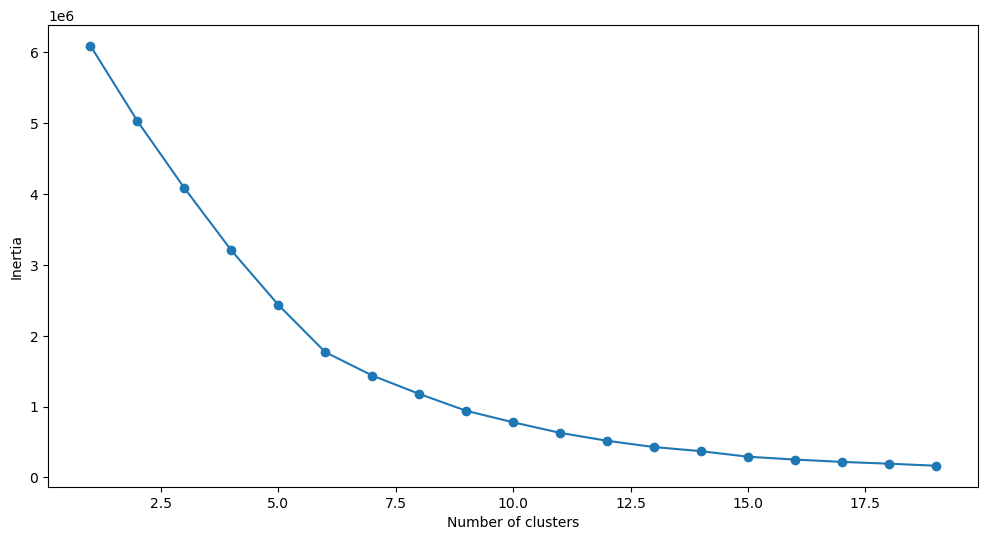

In [247]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8.
Let’s set the number of clusters as 5 and fit the model:

In [265]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finally, let’s look at the value count of points in each of the above-formed clusters:

In [266]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    934005
5     80223
2       510
3       218
1         2
4         1
7         1
6         1
Name: cluster, dtype: int64

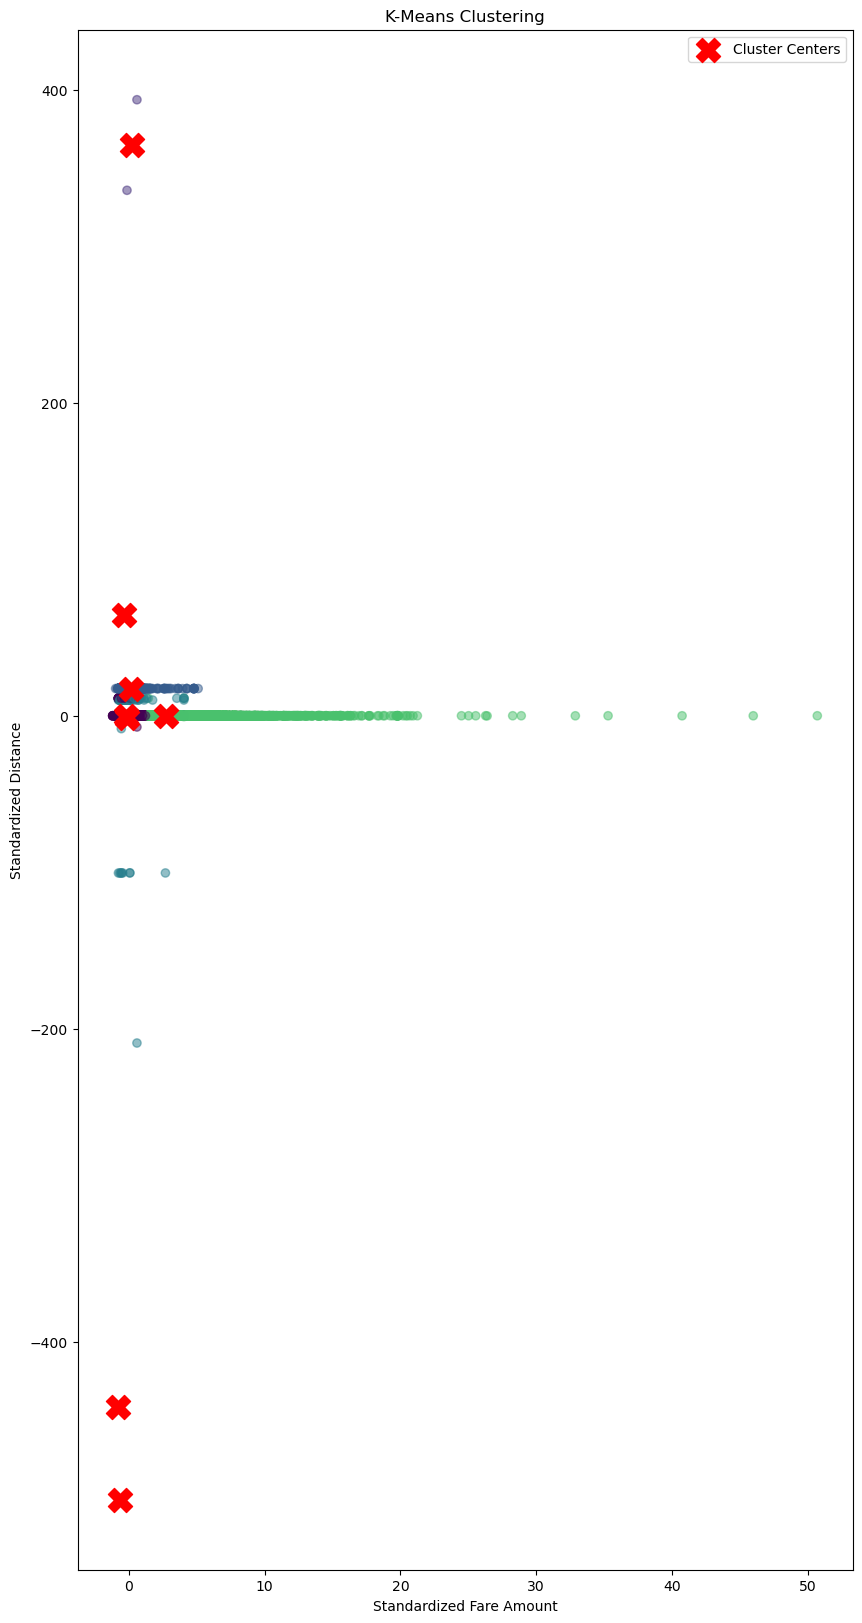

In [267]:
# Visualization of Clusters
plt.figure(figsize=(10,20))

# Scatter plot of data points colored by cluster
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=pred, cmap='viridis', marker='o', alpha=0.5)

# Cluster centers are marked in red
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Standardized Fare Amount')
plt.ylabel('Standardized Distance')
plt.legend()
plt.show()


In [268]:
filtered_frame = frame[frame['cluster'].isin([0, 2, 3])]
filtered_frame

,0,1,2,3,4,5,cluster
0,-0.759777,0.011321,0.005341,0.014057,0.003883,-0.042940,0
1,0.602559,-0.015973,0.003123,-0.011368,0.014922,0.045794,0
2,-0.550187,-0.009907,0.014212,-0.013184,0.010191,-0.038635,0
3,-0.340597,-0.011424,0.007558,-0.013184,0.011768,-0.021773,0
4,-0.654982,-0.008391,0.016429,-0.007735,0.014922,-0.031340,0
...,...,...,...,...,...,...,...
1014956,-0.445392,-0.006875,0.018647,-0.009551,0.011768,-0.033492,0
1014957,-0.235802,-0.011424,0.009776,-0.015000,0.011768,-0.028948,0
1014958,-0.445392,-0.006875,0.016429,-0.009551,0.010191,-0.031101,0
1014959,0.078584,-0.008391,0.011994,-0.013184,0.008614,-0.037798,0


In [269]:
# ... (your existing code)

# Assign the cluster labels to the original DataFrame
df4['cluster'] = pred

# Create a table showing the range of distances and count for each cluster
distance_ranges = df4.groupby('cluster')['Distance'].agg(['min', 'max', 'count']).reset_index()

# Rename the columns for clarity
distance_ranges.columns = ['Cluster', 'Min Distance', 'Max Distance', 'Count']

# Display the distance ranges table
print(distance_ranges)


   Cluster  Min Distance  Max Distance   Count
0        0          0.01       2592.87  934005
1        1       2880.05       8547.24       2
2        2          0.02       7347.01     510
3        3       2715.77      16878.30     218
4        4      12399.96      12399.96       1
5        5          0.01       1747.28   80223
6        6       8037.87       8037.87       1
7        7       6641.94       6641.94       1


In [270]:
df4.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,cluster
count,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06,1.014961e+06
mean,1.125012e+01,-7.391466e+01,4.069592e+01,-7.391740e+01,4.068538e+01,4.620652e+00,3.968704e-01
std,9.542433e+00,6.594764e+00,4.509113e+00,5.506498e+00,6.341252e+00,8.362066e+01,1.350019e+00
min,0.000000e+00,-3.377680e+03,-8.806300e+02,-3.383300e+03,-3.114340e+03,1.000000e-02,0.000000e+00
25%,6.000000e+00,-7.399000e+01,4.074000e+01,-7.399000e+01,4.074000e+01,1.280000e+00,0.000000e+00
50%,8.000000e+00,-7.398000e+01,4.075000e+01,-7.398000e+01,4.075000e+01,2.180000e+00,0.000000e+00
75%,1.200000e+01,-7.397000e+01,4.077000e+01,-7.397000e+01,4.077000e+01,3.960000e+00,0.000000e+00
max,4.950000e+02,2.522270e+03,2.621630e+03,1.717000e+03,1.989730e+03,1.687830e+04,7.000000e+00
